In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [15]:
# Load the Excel file
file_path = "/Users/sruji/Downloads/Survey Data Associate Assessment Project 2025.xlsx"
df = pd.read_excel(file_path, sheet_name='Sample Survey Data')
df.head()

,uuid,Age,Gender,Event Location,Event,Overall Satisfaction,Value,Security,Food and Beverage,Entertainment,Player Engagement,Venue,Merchandise,WiFi,Arrival,Departure
0,0087mwe4,55-64,Male,Mexico,Draft Party,9,3,7,1,10,2,10,3,5,8,10
1,01gply2p,45-54,Male,Ireland,Draft Party,5,4,7,6,8,7,10,6,9,8,9
2,027agr93,35-44,Male,Ireland,Watch Party,10,10,3,8,9,9,8,8,8,10,10
3,02dlmmn6,65+,Female,Mexico,Watch Party,8,7,3,7,6,8,10,7,9,10,8
4,02h21tmw,55-64,Female,Ireland,Watch Party,4,9,5,9,7,6,10,10,9,3,5


In [4]:
# Define the columns for analysis
aspect_columns = ["Value", "Security", "Food and Beverage", "Entertainment", 
                  "Player Engagement", "Venue", "Merchandise", "WiFi", "Arrival", "Departure"]

In [5]:
# Correlation analysis
correlation_matrix = df[["Overall Satisfaction"] + aspect_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                      Overall Satisfaction     Value  Security  \
Overall Satisfaction              1.000000  0.000328  0.088014   
Value                             0.000328  1.000000  0.068004   
Security                          0.088014  0.068004  1.000000   
Food and Beverage                 0.124669  0.111445  0.046548   
Entertainment                     0.031656  0.024288  0.113100   
Player Engagement                 0.070983  0.072172  0.100541   
Venue                             0.020723  0.048972  0.022460   
Merchandise                       0.072116  0.045271  0.097248   
WiFi                              0.052190  0.024772  0.058092   
Arrival                           0.013458  0.113278  0.081958   
Departure                         0.103353  0.072224  0.083022   

                      Food and Beverage  Entertainment  Player Engagement  \
Overall Satisfaction           0.124669       0.031656           0.070983   
Value                          0.

In [6]:
# Prepare the data for modeling
X = df[aspect_columns]  # Independent variables (event aspects)
y = df["Overall Satisfaction"]  # Dependent variable (target)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predict on test data
y_pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=aspect_columns).sort_values(ascending=False)

In [12]:
# Display model performance metrics
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared Score: {r2}")


Model Performance Metrics:
Mean Absolute Error: 2.0182724252491693
R-Squared Score: 0.012105332982640937


The Mean Absolute Error (MAE) is 2.02, indicating that predictions are off by about 2 points on average.
The R-Squared Score is only 0.012, meaning the model struggles to explain variation in overall satisfaction.
This suggests that additional variables (e.g., fan expectations, staff interactions, or specific event features) may play a bigger role in shaping satisfaction than the surveyed factors

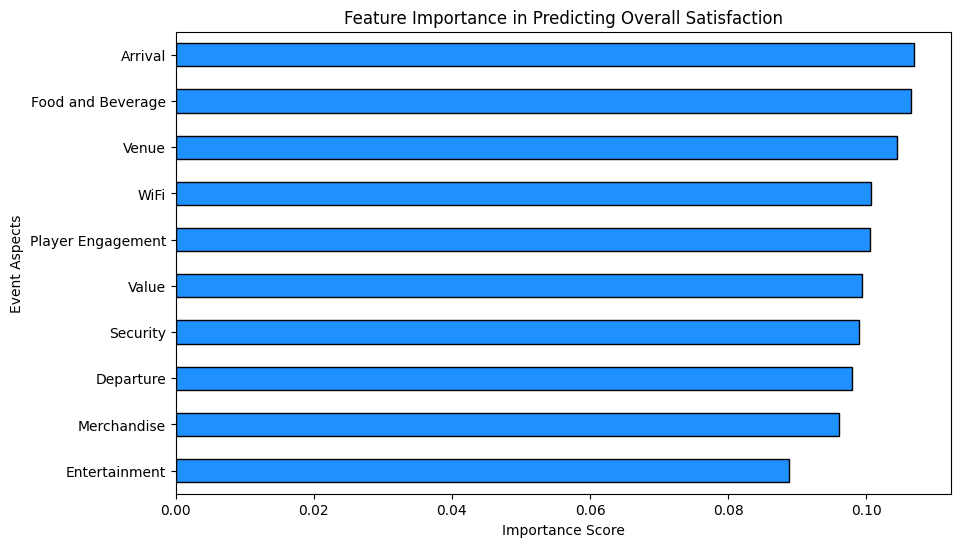

In [13]:
# Plot feature importance
plt.figure(figsize=(10,6))
feature_importances.sort_values().plot(kind='barh', color='dodgerblue', edgecolor='black')
plt.title("Feature Importance in Predicting Overall Satisfaction")
plt.xlabel("Importance Score")
plt.ylabel("Event Aspects")
plt.show()

# 1. Age Distribution

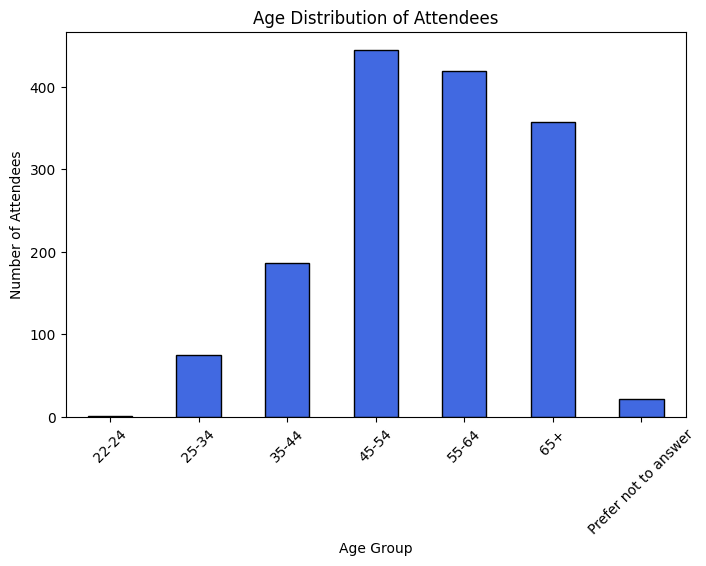

In [19]:
plt.figure(figsize=(8,5))
df['Age'].value_counts().sort_index().plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Age Distribution of Attendees')
plt.xlabel('Age Group')
plt.ylabel('Number of Attendees')
plt.xticks(rotation=45)
plt.show()

### Lower participation from the 22-24 and 25-34 groups suggests a need for targeted marketing or engagement strategies for younger fans

# 2. Event Location Distribution

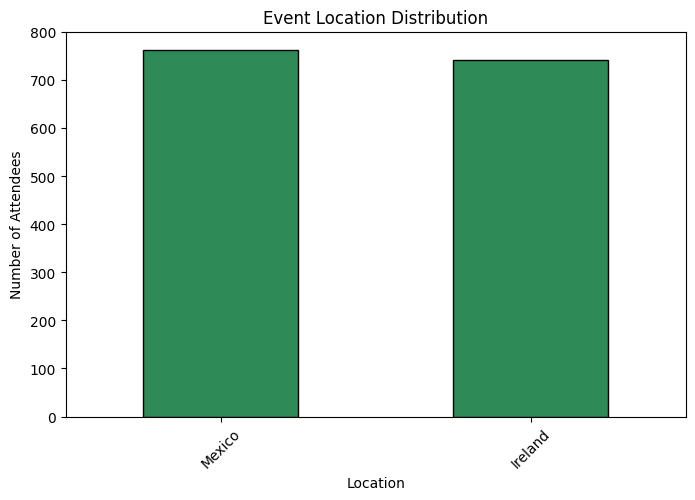

In [23]:
plt.figure(figsize=(8,5))
df['Event Location'].value_counts().plot(kind='bar', color='seagreen', edgecolor='black')
plt.title('Event Location Distribution')
plt.xlabel('Location')
plt.ylabel('Number of Attendees')
plt.xticks(rotation=45)
plt.show()

### Mexico and Ireland have similar attendance numbers, meaning fan interest is well-distributed

# 3. Overall Satisfaction by Event Type

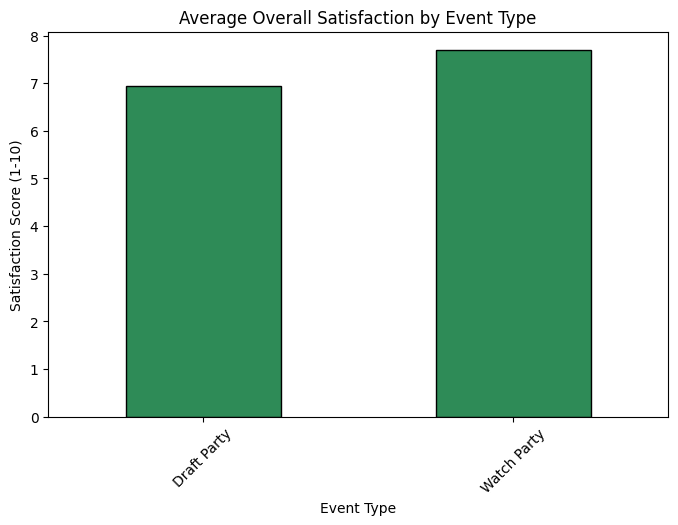

In [24]:
event_satisfaction = df.groupby('Event')['Overall Satisfaction'].mean()
plt.figure(figsize=(8,5))
event_satisfaction.plot(kind='bar', color='seagreen', edgecolor='black')
plt.title('Average Overall Satisfaction by Event Type')
plt.ylabel('Satisfaction Score (1-10)')
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.show()

### Watch Party has a higher average satisfaction score than Draft Party, suggesting a more engaging experience.
### Draft Party experiences may need improvements in fan engagement, entertainment, or logistics.


# 4. Overall Satisfaction by Event Location

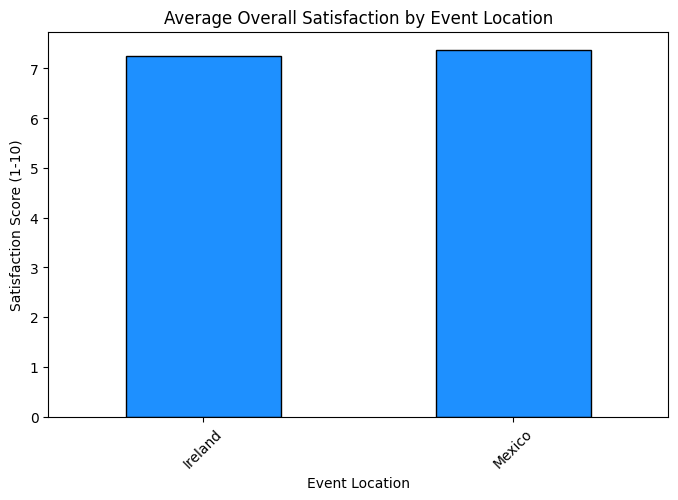

In [25]:
location_satisfaction = df.groupby('Event Location')['Overall Satisfaction'].mean()
plt.figure(figsize=(8,5))
location_satisfaction.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Average Overall Satisfaction by Event Location')
plt.ylabel('Satisfaction Score (1-10)')
plt.xlabel('Event Location')
plt.xticks(rotation=45)
plt.show()

# 5. Heatmap of Correlation Between Event Factors

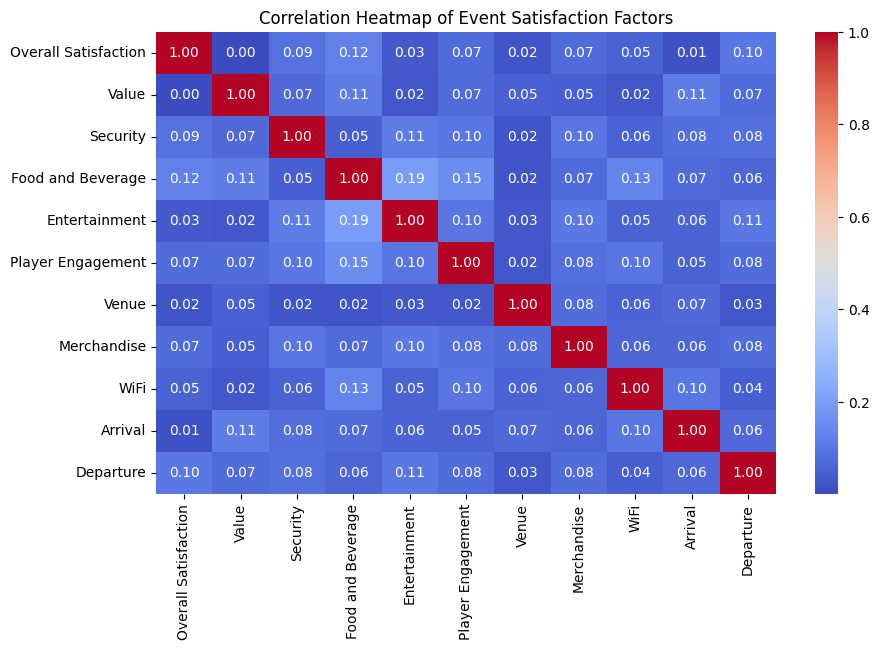

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Overall Satisfaction', 'Value', 'Security', 'Food and Beverage', 
                'Entertainment', 'Player Engagement', 'Venue', 'Merchandise', 
                'WiFi', 'Arrival', 'Departure']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Event Satisfaction Factors")
plt.show()

### Food & Beverage has the highest correlation (0.12) with Overall Satisfaction
### WiFi scores the lowest among all event aspects, highlighting a clear improvement area
### Food & Beverage also scores lower than expected, reinforcing the need for better variety, pricing, or service speed

# 6. Satisfaction Scores Across Age Groups

/var/folders/d2/ct38bz350dq_ht12tbjcm4m80000gn/T/ipykernel_91827/2264373056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Overall Satisfaction', data=df, palette="Blues")


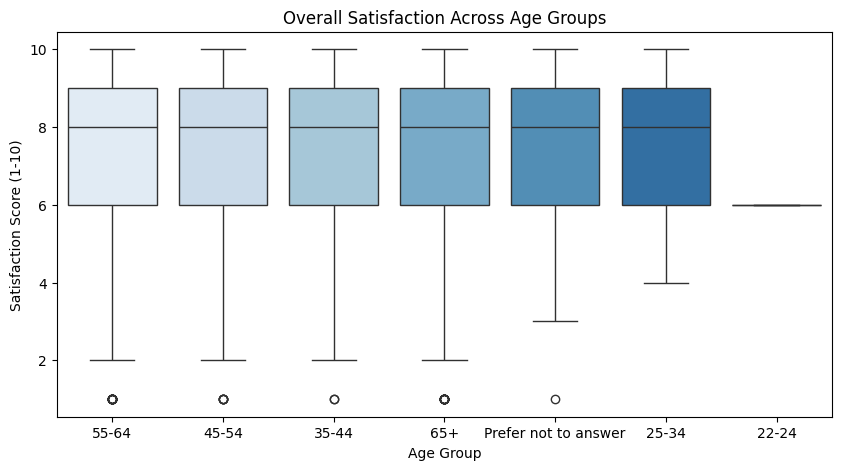

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Age', y='Overall Satisfaction', data=df, palette="Blues")
plt.title("Overall Satisfaction Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Satisfaction Score (1-10)")
plt.show()

# 7. Satisfaction by Gender

/var/folders/d2/ct38bz350dq_ht12tbjcm4m80000gn/T/ipykernel_91827/1881302794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Overall Satisfaction', data=df, palette="coolwarm")


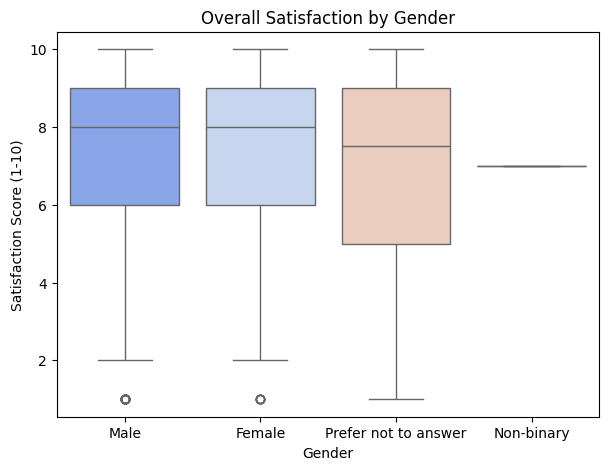

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='Overall Satisfaction', data=df, palette="coolwarm")
plt.title("Overall Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Satisfaction Score (1-10)")
plt.show()

# 8. Satisfaction Across Different Event Aspects

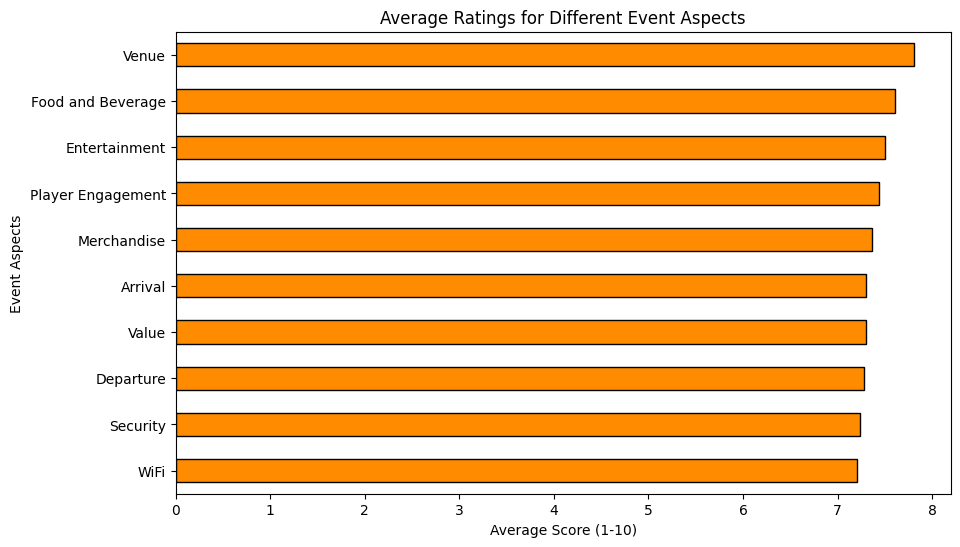

In [31]:
aspect_columns = ['Value', 'Security', 'Food and Beverage', 'Entertainment', 
                  'Player Engagement', 'Venue', 'Merchandise', 'WiFi', 'Arrival', 'Departure']
aspect_means = df[aspect_columns].mean().sort_values()

plt.figure(figsize=(10,6))
aspect_means.plot(kind='barh', color='darkorange', edgecolor='black')
plt.title("Average Ratings for Different Event Aspects")
plt.xlabel("Average Score (1-10)")
plt.ylabel("Event Aspects")
plt.show()


# Final Takeaways
### Food & Beverage remains the most critical factor to improve
### WiFi and digital engagement are growing priorities for fan experience
### Arrival logistics matter less than expected, but a smooth departure significantly impacts satisfaction
### The event type (Watch Party vs. Draft Party) influences satisfaction, with Watch Party performing better
### The current model does not fully capture satisfaction drivers, suggesting that additional variables should be analyzed